# Assignment 2
### by: Sharon Hendy - 209467158, Pan Eyal - 208722058

In this jupyter notebook we only show the results of the algorithms we wrote in the Blackjack.py and frozen_lake.py files.
For the BlackJack game, we represent states as tuples of (player sum, dealer showing, usable ace).
We added three special states that will be used as terminal states: WIN, LOSE, DRAW.  
First we will find the transition matrix and the reward function, then with the policy iteration algorithm, we will find the optimal policy using 3 different methods: MC first visit, MC every visit and SARSA.
The policy iteration uses an initial policy that always hit if the player sum is less than 20 as specified in the assignment.  
Finally, we will plot the value averages changes for each iteration during learning for each method.

In [111]:
import black_jack
import importlib
importlib.reload(black_jack)
from black_jack import transition_matrix, reward_function, monte_carlo_policy_iteration, sarsa_policy_iteration, ALL_STATES, WIN, LOSE, DRAW

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

### Get transition matrix and reward function

The transition matrix function calculates the transition matrix for the blackjack game.  
The function gets a sample size and runs sample size blackjack games.  
If the sampled action results in termination, the transitioned state will be determined by the received reward (WIN, LOSE, DRAW).  
The function prints all non-zero transition probabilities with a 3 decimal accuracy and returns the transition matrix.  
For the sake of keeping the PDF clean, we will not print the transition matrix here.

In [112]:
tr_matrix = transition_matrix(sample_size=10 ** 6, should_print=False)

100%|██████████| 1000000/1000000 [01:26<00:00, 11598.23it/s]


The reward function returns the already known reward function for the blackjack game that is:  
-> for a terminating state s: R(s) = 1 for win, R(s) = -1 for lose, R(s) = 0 for draw.  
-> for a non-terminating state s: R(s) = 0.


In [113]:
r_s_a = reward_function()

### Create a specific policy that always hit if the player sum is less than 20

In [114]:
pi = dict()
for state in ALL_STATES:
    pi[state] = 1 if state[0] < 21 else 0
for state in [WIN, LOSE, DRAW]:
    pi[state] = 0

### Run policy iteration with defferent methods and plot value averages changes
First we run the monte-carlo first-visit and every-visit:
The monte-carlo policy iteration function gets a transition matrix, a reward function, a number of episodes to perform and an optional initial policy.
The function iterates between the monte-carlo policy evaluation and the policy improvement functions until the policy is stable or a limit is reached.
The function returns the optimal value function, the optimal policy and the specified states average value over first 20 iterations for plotting the desired graph.

In [115]:
v_1, pi_1, value_avg_1 = monte_carlo_policy_iteration(tr_matrix, r_s_a, pi=pi.copy(), episodes=1000, first_visit=True)

Policy iteration did not converge after 500 iterations.


In [116]:
v_2, pi_2, value_avg_2 = monte_carlo_policy_iteration(tr_matrix, r_s_a, pi=pi.copy(), episodes=1000, first_visit=False)

Policy iteration did not converge after 500 iterations.


The sarsa policy iteration function gets the number of episodes to perform, a learning rate alpha, decay factor gamma and an exploration factor epsilon.
The function returns the optimal value function, the optimal policy and the specified states average value over first 20 iterations.


In [117]:
v_3, pi_3, value_avg_3 = sarsa_policy_iteration(episodes=1000, alpha=0.1, gamma=1.0, epsilon=0.3)

Policy iteration did not converge after 500 iterations.


### Plot value averages changes
Here we plot the average value of the specified states over first 20 iterations.

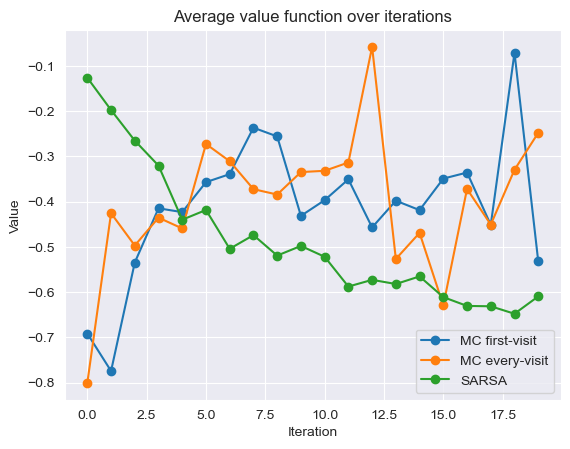

<Figure size 640x480 with 0 Axes>

In [118]:
plt.plot(np.arange(len(value_avg_1[:20])), value_avg_1[:20], 'o-', label="MC first-visit")
plt.plot(np.arange(len(value_avg_2[:20])), value_avg_2[:20], 'o-', label="MC every-visit")
plt.plot(np.arange(len(value_avg_3[:20])), value_avg_3[:20], 'o-', label="SARSA")
plt.title("Average value function over iterations")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.show()
plt.clf()

### Frozen Lake with Q-learning
Here we will find the optimal policy using Q-learning policy iteration for the Frozen Lake environment with the is_slippery flag set to True.
The Q-learning policy iteration function receives the number of episodes to perform before each policy improvement (episodes * steps = total number of episodes), a learning rate alpha and decay factor gamma.
For the e-greedy policy we use epsilon = 1 / <index_of_current_episode>, this way the exploration factor decreases as the number of episodes increases which corresponds to GLIE requirements and contributes to convergence.
We used alpha = 0.5 to allow the algorithm to modify the Q function at a moderate pace.

In [120]:
import frozen_lake
import importlib
importlib.reload(frozen_lake)

from frozen_lake import q_learning_policy_iteration

In [125]:
v_4, pi_4, v_start_list = q_learning_policy_iteration(episodes=10000, steps=10, alpha=0.5, gamma=0.95)

Here we plot the average value of the initial state after every 10000 episodes.

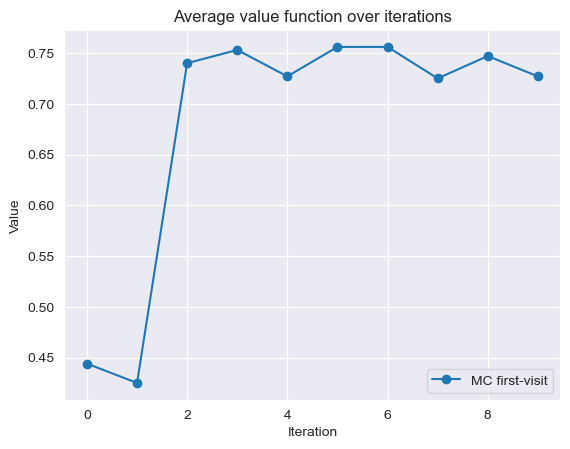

<Figure size 640x480 with 0 Axes>

In [126]:
plt.plot(np.arange(len(v_start_list)), v_start_list, 'o-', label="MC first-visit")
plt.title("Average value function over iterations")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.legend()
plt.show()
plt.clf()